In [1]:
import json
import requests
import pandas as pd

In [2]:
public_articles = json.load(open('public_articles_data.json'))

In [3]:
len(public_articles)

9000

# Number of publications by type

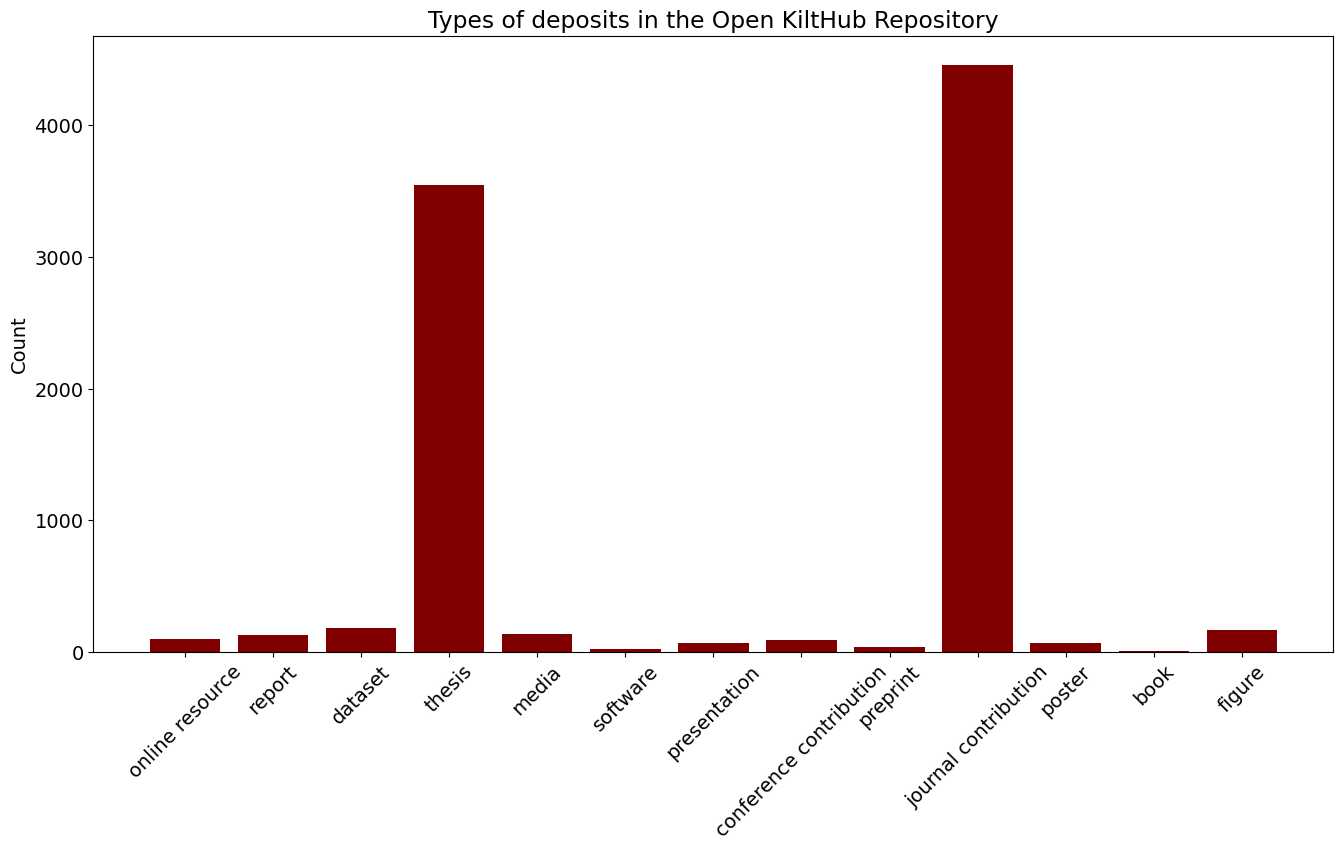

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams.update({'font.size': 14})  # Adjusts the default font size

# Extract 'defined_type' values
defined_types = [article['defined_type_name'] for article in public_articles if 'defined_type_name' in article]

# Count occurrences
type_counts = Counter(defined_types)

# Prepare data for plotting
types = list(type_counts.keys())
counts = list(type_counts.values())

# Create bar plot
plt.figure(figsize=(16, 8))
plt.bar(types, counts, color='maroon')
plt.ylabel('Count')
plt.title('Types of deposits in the Open KiltHub Repository')
plt.xticks(rotation=45)
plt.show()

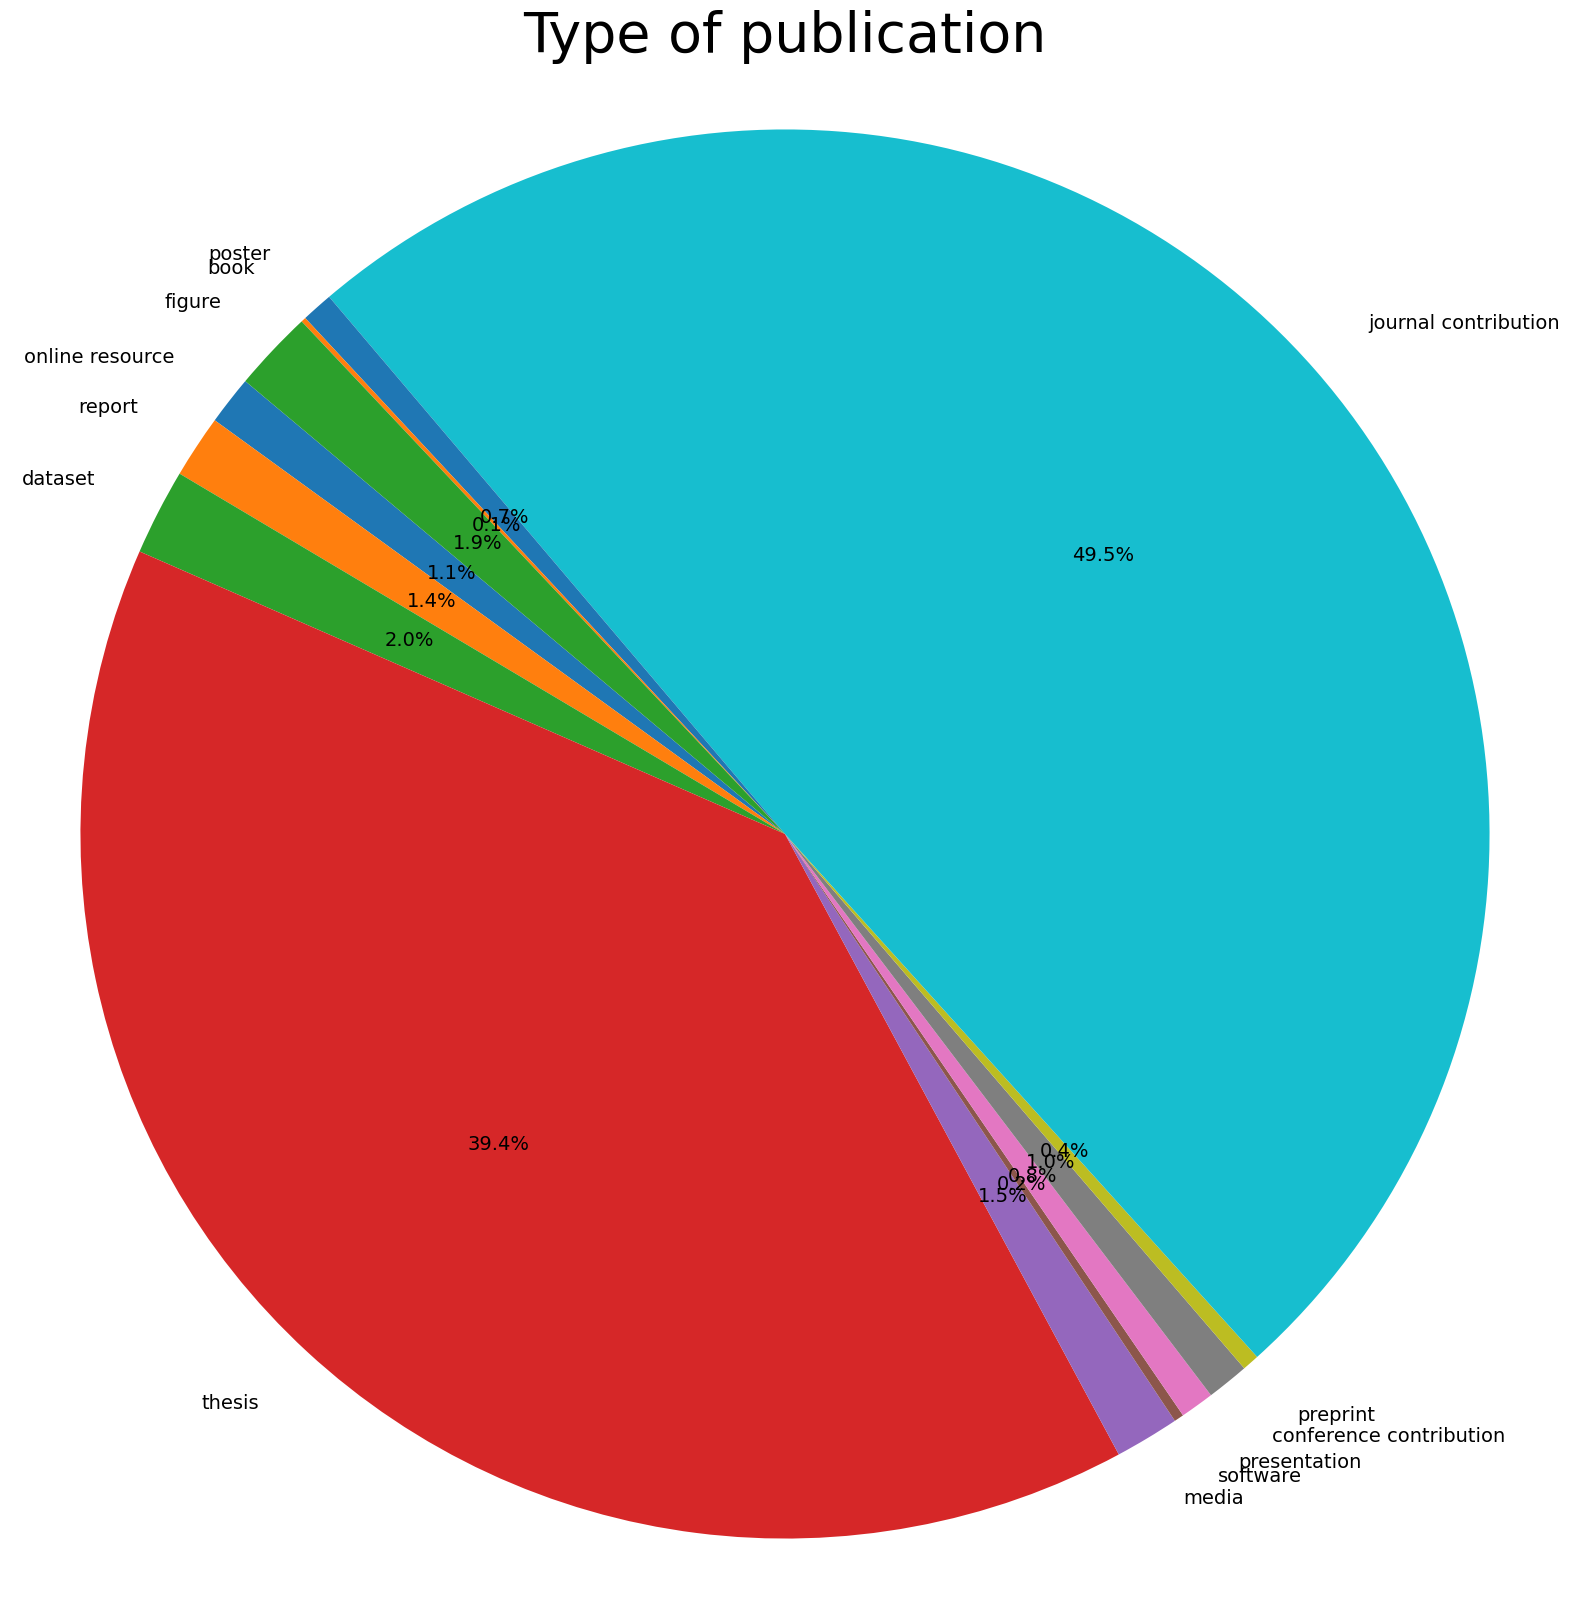

In [6]:
# Create pie chart
plt.figure(figsize=(20, 20))
plt.pie(counts, labels=types, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Type of publication', fontsize=40)
plt.show()

# From these publications, how many authors have their ORCiD linked? 

In [8]:
has_orcid = []
for article in public_articles:
    if 'authors' in article:
        try:
            if len(article['authors'][0]['orcid_id']) > 0:
                has_orcid.append(True)
            else:
                has_orcid.append(False)
        except:
            print('No ORCID')

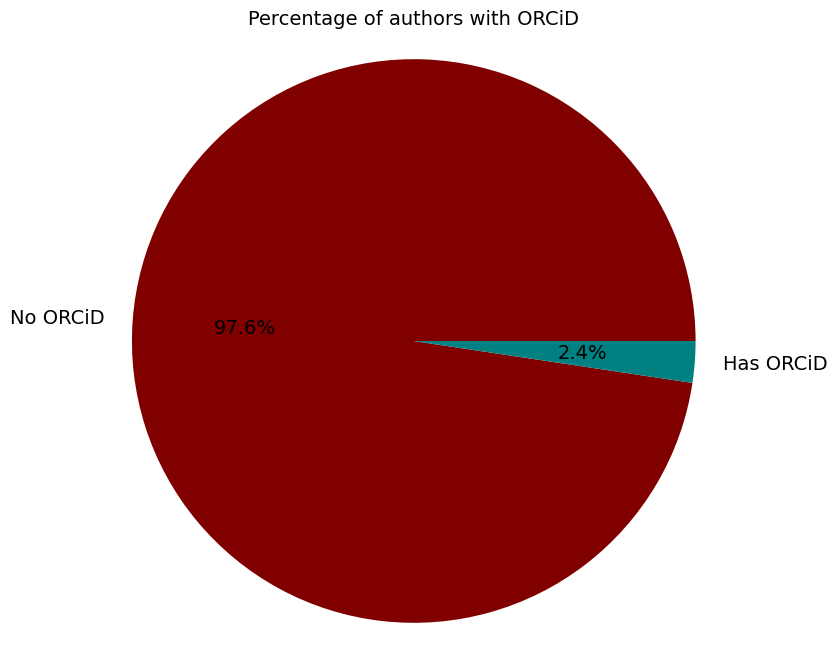

In [11]:
orcid_counts = Counter(has_orcid)

# Prepare data for plotting
labels = ['No ORCiD' if not key else 'Has ORCiD' for key in orcid_counts.keys()]
sizes = orcid_counts.values()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0,colors=['#800000', '#008080'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of authors with ORCiD', fontsize=14)
plt.show()

# What about Datasets?

In [5]:
datasets = []

for article in public_articles:
    if article['defined_type_name'] == 'dataset':
       datasets.append(article)

In [37]:
def has_readme(article):
    readm = False
    for file in article['files']:
        if 'readme' in file['name'].lower():
            return True
    if not readm:
        return False

def is_zip(article):
    for file in article['files']:
        if file['mimetype'] == 'application/zip':
            return True
    return False

In [7]:
have_readme = []
for nd in range(0,len(datasets)):
    try:
        have_readme.append(has_readme(datasets[nd]))
    except:
        have_readme.append(False)
        print(f'Dataset No.{nd} has no files?')

Dataset No.5 has no files?
Dataset No.77 has no files?
Dataset No.85 has no files?


# How many public datasets have a readme file?

Text(0.5, 1.0, 'Percentage of datasets with README')

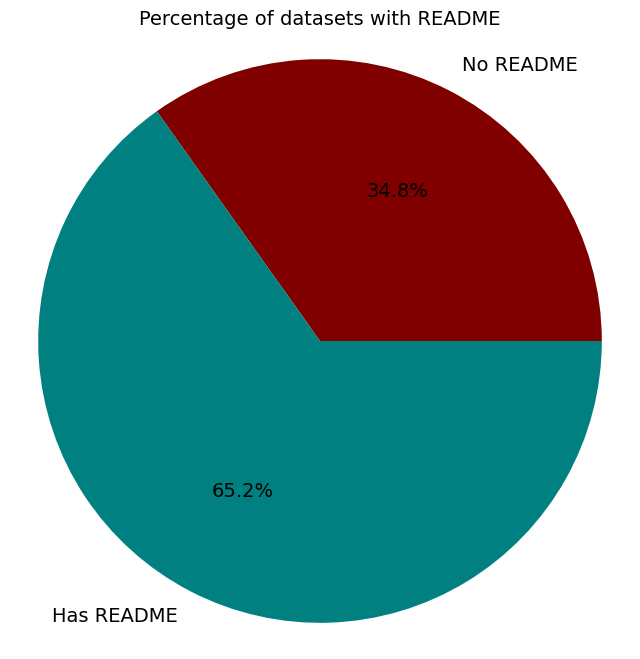

In [15]:
readme_counts = Counter(have_readme)

# Prepare data for plotting
labels = ['No README' if not key else 'Has README' for key in readme_counts.keys()]
sizes = readme_counts.values()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0,colors=['#800000', '#008080'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of datasets with README', fontsize=14)

# When were this datasets published? (make them public on KH)

In [8]:
from datetime import datetime
created_years = [datetime.strptime(article['created_date'].split('T')[0], "%Y-%m-%d").year for article in datasets if 'created_date' in article]


In [9]:
no_rdm_ix = [index for index, value in enumerate(have_readme) if not value]
rdm_ix =  [index for index, value in enumerate(have_readme) if value]

In [12]:
no_rdm_count = Counter([created_years[i] for i in no_rdm_ix]  )
rdm_count = Counter([created_years[i] for i in rdm_ix])

nordm_years = sorted(no_rdm_count.keys())
rdm_years = sorted(rdm_count.keys())

nordm_counts = [no_rdm_count[year] for year in nordm_years]
rdm_counts = [rdm_count[year] for year in rdm_years]


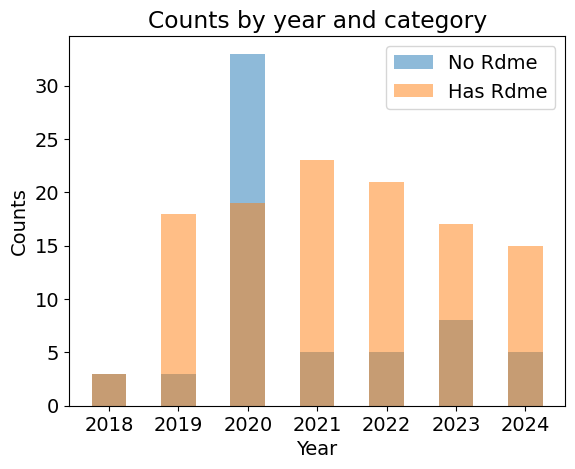

<Figure size 800x800 with 0 Axes>

In [20]:
width = 0.5
fig, ax = plt.subplots()
bars1 = ax.bar(nordm_years, nordm_counts, width, label='No Rdme', alpha=0.5)
bars2 = ax.bar(rdm_years, rdm_counts, width, label='Has Rdme', alpha=0.5)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
plt.figure(figsize=(8, 8))
ax.set_xlabel('Year')
ax.set_ylabel('Counts')
ax.set_title('Counts by year and category')
ax.legend()

plt.show()

In [38]:
have_zip = []
for nd in range(0,len(datasets)):
    try:
        have_zip.append(is_zip(datasets[nd]))
    except:
        have_zip.append(False)
        print(f'Dataset No.{nd} has no files?')

Dataset No.5 has no files?
Dataset No.77 has no files?
Dataset No.85 has no files?


In [36]:
datasets[no_rdm_ix[10]]['files']

[{'id': 43117111,
  'name': '00_helpful_project_data.zip',
  'size': 34531216,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/43117111',
  'supplied_md5': '2721a9ed18543e5a234b07eb6e738688',
  'computed_md5': '2721a9ed18543e5a234b07eb6e738688',
  'mimetype': 'application/zip'}]

In [40]:
zip_nordm = [have_zip[no_rdm_ix[i]] for i in range(len(no_rdm_ix))]

Text(0.5, 1.0, 'Percentage of datasets with Zip')

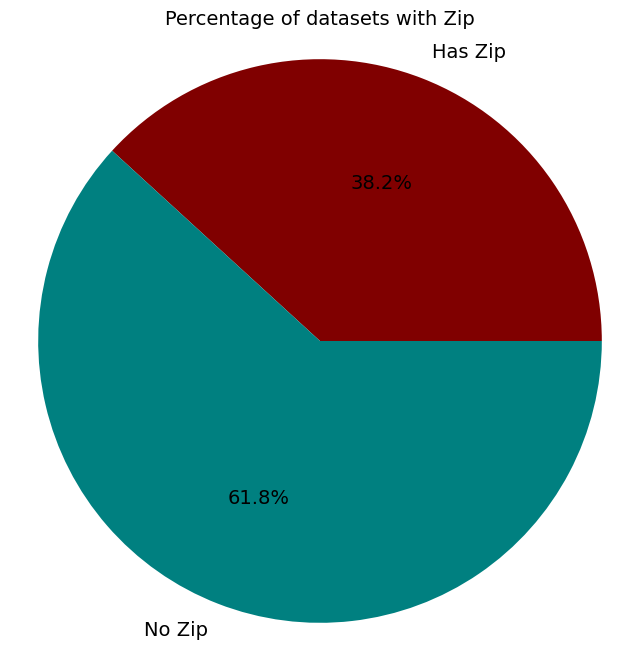

In [41]:
zipfile_counts = Counter(have_zip)

# Prepare data for plotting
labels = ['No Zip' if not key else 'Has Zip' for key in zipfile_counts.keys()]
sizes = zipfile_counts.values()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0,colors=['#800000', '#008080'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of datasets with Zip', fontsize=14)

[True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True]